In [1]:
%matplotlib inline

import math
import time
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import beta
from scipy.ndimage.interpolation import shift
import seaborn as sns

In [2]:
from pathlib import Path

commondir = './2020-05-27/'
Path(commondir + "images").mkdir(parents=True, exist_ok=True)

In [3]:
def NormalizeUtility(val, numplayers):
    return   (0.5/numplayers - val)/(0.5/numplayers)


# Sim Beta

In [4]:
####################
# Sim Beta
####################
dir = commondir + 'sim-beta/results'

# History length
historyLenArray = [100] 
alpha = 1 


# Number of players
numplayersArray = [64]

# betafactor (dishonest beta factor) Array
betafactorArray = [1.05, 1.1, 1.2, 1.3, 1.4, 1.5]

# Number of Liars
numLiarsArray = [1]

# Number of clusters
numclustersArray = [8]


if not os.path.exists(dir):
    os.mkdir(dir)
    
frames=[]    
for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue

                    rounds = historyLen*10
                    file_name = 'QPQRst-{0}-{1}-{2}-{3}-{4}-{5}-{6}.csv'.format(str(numplayers),str(numclusters),str(rounds),str(betaFactor),str(numLiars),str(historyLen), "*")
                    search_path = os.path.join(dir, file_name)
                    for fname in glob.glob(search_path):
                        # print("Reading file ", fname," using numplayers =", numplayers, 
                        #      " numclusters = ", numclusters, " numLiars = ", numLiars, " betafactor = ", betaFactor, " and historyLen = ", historyLen)
                        tmpdf = pd.read_csv(fname)
                        frames.append(tmpdf)
                                    
df = pd.concat(frames, ignore_index=True)
df.head(20)

,players,clusters,playerperclusters,numliars,QPQversion,alpha,rounds,betafactor,QPQHL,QPQTH,...,QPQ2HL1,QPQ2TH1,UtilityHonest,UtilityDishonest,FNTotalHonest,FNTotalDishonest,UtilityHonest_HL,UtilityDishonest_HL,FNTotalHonest_HL,FNTotalDishonest_HL
0,64,8,64,1,1,NaN,1000,1.05,100,0.97,...,NaN,NaN,0.000270,0.000135,0.008794,0.055,0.000274,0.000130,0.008818,0.061111
1,64,8,8,1,2,1.0,1000,1.05,100,0.97,...,400.0,0.981637,0.000257,0.000135,0.000317,0.000,0.000262,0.000130,0.000335,0.000000
2,64,8,64,1,1,NaN,1000,1.05,100,0.97,...,NaN,NaN,0.000324,0.000830,0.011222,0.055,0.000333,0.000906,0.011693,0.061111
3,64,8,8,1,2,1.0,1000,1.05,100,0.97,...,400.0,0.981637,0.000274,0.000906,0.011143,0.000,0.000278,0.000991,0.012363,0.000000
4,64,8,64,1,1,NaN,1000,1.05,100,0.97,...,NaN,NaN,0.000335,0.000053,0.010333,0.009,0.000326,0.000059,0.010617,0.008889
5,64,8,8,1,2,1.0,1000,1.05,100,0.97,...,400.0,0.981637,0.000265,0.000053,0.001635,0.000,0.000262,0.000059,0.001252,0.000000
6,64,8,64,1,1,NaN,1000,1.05,100,0.97,...,NaN,NaN,0.000320,0.000604,0.011746,0.009,0.000323,0.000664,0.012169,0.010000
7,64,8,8,1,2,1.0,1000,1.05,100,0.97,...,400.0,0.981637,0.000266,0.000254,0.000000,0.000,0.000266,0.000276,0.000000,0.000000
8,64,8,64,1,1,NaN,1000,1.05,100,0.97,...,NaN,NaN,0.000290,0.000200,0.010540,0.001,0.000298,0.000153,0.011146,0.001111
9,64,8,8,1,2,1.0,1000,1.05,100,0.97,...,400.0,0.981637,0.000264,0.000200,0.000603,0.000,0.000250,0.000153,0.000000,0.000000


In [5]:
####################
# Sim Beta
####################
for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue

                    dfTmp1 = df[(df.QPQversion == 1) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor)]
                    dfTmp2 = df[(df.QPQversion == 2) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor)]

                    dfTmp1Mix = dfTmp1[(dfTmp1.numliars == 1)]
                    dfTmp2Mix = dfTmp2[(dfTmp2.numliars == 1)]

                    UtilityMixHonests1 = dfTmp1Mix.UtilityHonest.mean()
                    UtilityMixHonests2 = dfTmp2Mix.UtilityHonest.mean()
                    if (numLiars > 0):
                        UtilityMixDishonests1 = dfTmp1Mix.UtilityDishonest.mean()
                        UtilityMixDishonests2 = dfTmp2Mix.UtilityDishonest.mean()

                    print("\nSimulation using numplayers =", numplayers, " numclusters = ", numclusters, 
                          " numLiars = ", numLiars, " betafactor = ", betaFactor, " and historyLen = ", historyLen)
                    if (numLiars > 0):
                        print("\n\tPlayer Utility QPQ. Honest players: {:.5f}, Dishonest player: {:.5f}".format(UtilityMixHonests1, UtilityMixDishonests1))
                        print("\tPlayer Utility QPQ2. Honest players: {:.5f}, Dishonest player: {:.5f}".format(UtilityMixHonests2, UtilityMixDishonests2))
                        print("\tPlayer Utility Ratio QPQ/QPQ2. Honest players: {:.5f}, Dishonest player: {:.5f}".format(UtilityMixHonests1/UtilityMixHonests2, UtilityMixDishonests1/UtilityMixDishonests2))


Simulation using numplayers = 64  numclusters =  8  numLiars =  1  betafactor =  1.05  and historyLen =  100

	Player Utility QPQ. Honest players: 0.00033, Dishonest player: 0.00030
	Player Utility QPQ2. Honest players: 0.00029, Dishonest player: 0.00028
	Player Utility Ratio QPQ/QPQ2. Honest players: 1.14320, Dishonest player: 1.07214

Simulation using numplayers = 64  numclusters =  8  numLiars =  1  betafactor =  1.1  and historyLen =  100

	Player Utility QPQ. Honest players: 0.00033, Dishonest player: 0.00034
	Player Utility QPQ2. Honest players: 0.00029, Dishonest player: 0.00043
	Player Utility Ratio QPQ/QPQ2. Honest players: 1.14072, Dishonest player: 0.80503

Simulation using numplayers = 64  numclusters =  8  numLiars =  1  betafactor =  1.2  and historyLen =  100

	Player Utility QPQ. Honest players: 0.00033, Dishonest player: 0.00064
	Player Utility QPQ2. Honest players: 0.00029, Dishonest player: 0.00113
	Player Utility Ratio QPQ/QPQ2. Honest players: 1.13616, Dishonest p

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


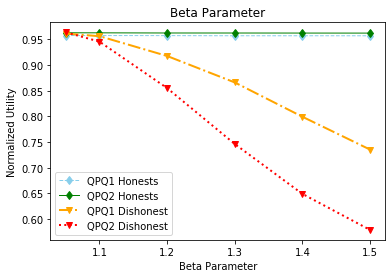

In [6]:
####################
# Sim Beta
####################
simresults = {'UtilityHonests1': [], 'UtilityHonests2': [], 'QPQ/QPQ2_Honests': [], 
              'UtilityDishonests1': [], 'UtilityDishonests2': [], 'QPQ/QPQ2_Dishonests': [],
              'betaFactor': [] 
             }
for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue
         
                    dfTmp1 = df[(df.QPQversion == 1) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars)]
                    dfTmp2 = df[(df.QPQversion == 2) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars)]
                    
                    UtilityHonests1 = dfTmp1.UtilityHonest.mean()
                    UtilityHonests2 = dfTmp2.UtilityHonest.mean()

                    simresults['UtilityHonests1'].append(NormalizeUtility(UtilityHonests1, numplayers))
                    simresults['UtilityHonests2'].append(NormalizeUtility(UtilityHonests2 , numplayers))
                    simresults['QPQ/QPQ2_Honests'].append(UtilityHonests1/UtilityHonests2)

                    if (numLiars > 0):
                        UtilityMixDishonests1 = dfTmp1.UtilityDishonest.mean()
                        UtilityMixDishonests2 = dfTmp2.UtilityDishonest.mean()

                        simresults['UtilityDishonests1'].append(NormalizeUtility(UtilityMixDishonests1, numplayers))
                        simresults['UtilityDishonests2'].append(NormalizeUtility(UtilityMixDishonests2, numplayers))
                        simresults['QPQ/QPQ2_Dishonests'].append(UtilityMixDishonests1/UtilityMixDishonests2)
                    else:
                        simresults['UtilityDishonests1'].append(0)
                        simresults['UtilityDishonests2'].append(0)
                        simresults['QPQ/QPQ2_Dishonests'].append(1)

                    simresults['betaFactor'].append(betaFactor)
                    
rst = pd.DataFrame(data=simresults) 
# multiple line plot
plt.plot( 'betaFactor', 'UtilityHonests1', data=rst, marker='d', color='skyblue', linestyle='--', linewidth=1, label="QPQ1 Honests")
plt.plot( 'betaFactor', 'UtilityHonests2', data=rst, marker='d', color='green', linestyle='-', linewidth=1, label="QPQ2 Honests")
plt.plot( 'betaFactor', 'UtilityDishonests1', data=rst, marker='v', color='orange', linestyle='-.', linewidth=2, label="QPQ1 Dishonest")
plt.plot( 'betaFactor', 'UtilityDishonests2', data=rst, marker='v', color='red', linestyle=':', linewidth=2, label="QPQ2 Dishonest")
plt.title("Beta Parameter")
plt.xlabel("Beta Parameter")
plt.ylabel("Normalized Utility");
plt.legend()
plt.savefig(commondir + 'images/betaparameter.eps', format='eps')
plt.savefig(commondir + 'images/betaparameter.pdf', format='pdf')

Nota: Parece que 1.05 es el limite de deteccion de qpq y qpq2. Proponemos ampliar la historia de este escenario para ver si mejora QPQ2

# Sim Clusters

In [7]:
####################
# Sim Cluster
####################
dir = commondir + 'sim-clusters/results'

# History length
historyLenArray = [100] 
alpha = 1 


# Number of players
numplayersArray = [64]

# betafactor (dishonest beta factor) Array
betafactorArray = [1.2]

# Number of Liars
numLiarsArray = [1]

# Number of clusters
numclustersArray = [2, 4, 8, 16, 32]


if not os.path.exists(dir):
    os.mkdir(dir)
    
frames=[]    
for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue

                    rounds = historyLen*10
                    file_name = 'QPQRst-{0}-{1}-{2}-{3}-{4}-{5}-{6}.csv'.format(str(numplayers),str(numclusters),str(rounds),str(betaFactor),str(numLiars),str(historyLen), "*")
                    search_path = os.path.join(dir, file_name)
                    for fname in glob.glob(search_path):
                        # print("Reading file ", fname," using numplayers =", numplayers, 
                        #     " numclusters = ", numclusters, " numLiars = ", numLiars, " betafactor = ", betaFactor, " and historyLen = ", historyLen)
                        tmpdf = pd.read_csv(fname)
                        frames.append(tmpdf)
                                    
df = pd.concat(frames, ignore_index=True)
df.head(20)

,players,clusters,playerperclusters,numliars,QPQversion,alpha,rounds,betafactor,QPQHL,QPQTH,...,QPQ2HL1,QPQ2TH1,UtilityHonest,UtilityDishonest,FNTotalHonest,FNTotalDishonest,UtilityHonest_HL,UtilityDishonest_HL,FNTotalHonest_HL,FNTotalDishonest_HL
0,64,2,64,1,1,NaN,1000,1.2,100,0.97,...,NaN,NaN,0.000307,0.000760,0.012349,0.104,0.000312,0.000833,0.013069,0.115556
1,64,2,32,1,2,1.0,1000,1.2,100,0.97,...,188.0,0.983929,0.000296,0.000801,0.000000,0.000,0.000299,0.000878,0.000000,0.000000
2,64,2,64,1,1,NaN,1000,1.2,100,0.97,...,NaN,NaN,0.000351,0.000090,0.012444,0.056,0.000345,0.000082,0.013122,0.062222
3,64,2,32,1,2,1.0,1000,1.2,100,0.97,...,188.0,0.983929,0.000314,0.000794,0.000048,0.000,0.000320,0.000864,0.000000,0.000000
4,64,2,64,1,1,NaN,1000,1.2,100,0.97,...,NaN,NaN,0.000352,0.000088,0.016444,0.031,0.000365,0.000080,0.017707,0.034444
5,64,2,32,1,2,1.0,1000,1.2,100,0.97,...,188.0,0.983929,0.000307,0.000088,0.000000,0.000,0.000316,0.000080,0.000000,0.000000
6,64,2,64,1,1,NaN,1000,1.2,100,0.97,...,NaN,NaN,0.000303,0.000073,0.011603,0.033,0.000289,0.000081,0.011640,0.026667
7,64,2,32,1,2,1.0,1000,1.2,100,0.97,...,188.0,0.983929,0.000280,0.000919,0.000000,0.000,0.000283,0.001022,0.000000,0.000000
8,64,2,64,1,1,NaN,1000,1.2,100,0.97,...,NaN,NaN,0.000381,0.000849,0.013333,0.055,0.000396,0.000090,0.013563,0.045556
9,64,2,32,1,2,1.0,1000,1.2,100,0.97,...,188.0,0.983929,0.000350,0.000582,0.008873,0.000,0.000361,0.000646,0.009859,0.000000


In [8]:
####################
# Sim Cluster
####################
for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue

                    dfTmp1 = df[(df.QPQversion == 1) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor)]
                    dfTmp2 = df[(df.QPQversion == 2) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor)]

                    dfTmp1Mix = dfTmp1[(dfTmp1.numliars == 1)]
                    dfTmp2Mix = dfTmp2[(dfTmp2.numliars == 1)]

                    UtilityMixHonests1 = dfTmp1Mix.UtilityHonest.mean()
                    UtilityMixHonests2 = dfTmp2Mix.UtilityHonest.mean()
                    if (numLiars > 0):
                        UtilityMixDishonests1 = dfTmp1Mix.UtilityDishonest.mean()
                        UtilityMixDishonests2 = dfTmp2Mix.UtilityDishonest.mean()

                    print("\nSimulation using numplayers =", numplayers, " numclusters = ", numclusters, 
                          " numLiars = ", numLiars, " betafactor = ", betaFactor, " and historyLen = ", historyLen)
                    if (numLiars > 0):
                        print("\n\tPlayer Utility QPQ. Honest players: {:.5f}, Dishonest player: {:.5f}".format(UtilityMixHonests1, UtilityMixDishonests1))
                        print("\tPlayer Utility QPQ2. Honest players: {:.5f}, Dishonest player: {:.5f}".format(UtilityMixHonests2, UtilityMixDishonests2))
                        print("\tPlayer Utility Ratio QPQ/QPQ2. Honest players: {:.5f}, Dishonest player: {:.5f}".format(UtilityMixHonests1/UtilityMixHonests2, UtilityMixDishonests1/UtilityMixDishonests2))


Simulation using numplayers = 64  numclusters =  2  numLiars =  1  betafactor =  1.2  and historyLen =  100

	Player Utility QPQ. Honest players: 0.00034, Dishonest player: 0.00064
	Player Utility QPQ2. Honest players: 0.00030, Dishonest player: 0.00068
	Player Utility Ratio QPQ/QPQ2. Honest players: 1.13594, Dishonest player: 0.93034

Simulation using numplayers = 64  numclusters =  4  numLiars =  1  betafactor =  1.2  and historyLen =  100

	Player Utility QPQ. Honest players: 0.00034, Dishonest player: 0.00062
	Player Utility QPQ2. Honest players: 0.00029, Dishonest player: 0.00095
	Player Utility Ratio QPQ/QPQ2. Honest players: 1.15822, Dishonest player: 0.65774

Simulation using numplayers = 64  numclusters =  8  numLiars =  1  betafactor =  1.2  and historyLen =  100

	Player Utility QPQ. Honest players: 0.00033, Dishonest player: 0.00062
	Player Utility QPQ2. Honest players: 0.00029, Dishonest player: 0.00115
	Player Utility Ratio QPQ/QPQ2. Honest players: 1.13909, Dishonest pl

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


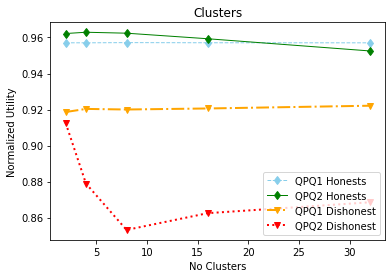

In [9]:
####################
# Sim Cluster
####################
simresults = {'UtilityHonests1': [], 'UtilityHonests2': [], 'QPQ/QPQ2_Honests': [], 
              'UtilityDishonests1': [], 'UtilityDishonests2': [], 'QPQ/QPQ2_Dishonests': [],
              'numclusters': [] 
             }
for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue
         
                    dfTmp1 = df[(df.QPQversion == 1) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars)]
                    dfTmp2 = df[(df.QPQversion == 2) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars)]
                    
                    UtilityHonests1 = dfTmp1.UtilityHonest.mean()
                    UtilityHonests2 = dfTmp2.UtilityHonest.mean()

                    simresults['UtilityHonests1'].append(NormalizeUtility(UtilityHonests1, numplayers))
                    simresults['UtilityHonests2'].append(NormalizeUtility(UtilityHonests2, numplayers))
                    simresults['QPQ/QPQ2_Honests'].append(UtilityHonests1/UtilityHonests2)

                    if (numLiars > 0):
                        UtilityMixDishonests1 = dfTmp1.UtilityDishonest.mean()
                        UtilityMixDishonests2 = dfTmp2.UtilityDishonest.mean()

                        simresults['UtilityDishonests1'].append(NormalizeUtility(UtilityMixDishonests1, numplayers))
                        simresults['UtilityDishonests2'].append(NormalizeUtility(UtilityMixDishonests2, numplayers))
                        simresults['QPQ/QPQ2_Dishonests'].append(UtilityMixDishonests1/UtilityMixDishonests2)
                    else:
                        simresults['UtilityDishonests1'].append(0)
                        simresults['UtilityDishonests2'].append(0)
                        simresults['QPQ/QPQ2_Dishonests'].append(1)

                    simresults['numclusters'].append(numclusters)
                    
rst = pd.DataFrame(data=simresults)
# multiple line plot
plt.plot( 'numclusters', 'UtilityHonests1', data=rst, marker='d', color='skyblue', linestyle='--', linewidth=1, label="QPQ1 Honests")
plt.plot( 'numclusters', 'UtilityHonests2', data=rst, marker='d', color='green', linestyle='-', linewidth=1, label="QPQ2 Honests")
plt.plot( 'numclusters', 'UtilityDishonests1', data=rst, marker='v', color='orange', linestyle='-.', linewidth=2, label="QPQ1 Dishonest")
plt.plot( 'numclusters', 'UtilityDishonests2', data=rst, marker='v', color='red', linestyle=':', linewidth=2, label="QPQ2 Dishonest")
plt.title("Clusters")
plt.xlabel("No Clusters")
plt.ylabel("Normalized Utility");
plt.legend()
plt.savefig(commondir + 'images/noclusters.eps', format='eps')
plt.savefig(commondir + 'images/noclusters.pdf', format='pdf')

Nota:parece que el valor optimo de QPQ 2 se corresponde con 8 clusters. Numero de jugadores es igual que el numero de cluster. El test KS es identico en ambos sentidos.
Proponemos hacer una simulacion con mas jugadores y mas clusters para ver si sigue siendo valido que el optimo esta en Sqrt(jugadores).

# Sim Dishonest

In [10]:
####################
# Sim Dishonest
####################
dir = commondir + 'sim-dishonest/results'

# History length
historyLenArray = [100] 
alpha = 1 

# Number of players
numplayersArray = [64]

# betafactor (dishonest beta factor) Array
betafactorArray = [1.2]

# Number of Liars
numLiarsArray = [0, 1, 2, 3, 4, 5, 6, 7, 8]

# Number of clusters
numclustersArray = [8]


if not os.path.exists(dir):
    os.mkdir(dir)
    
frames=[]    
for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue

                    rounds = historyLen*10
                    file_name = 'QPQRst-{0}-{1}-{2}-{3}-{4}-{5}-{6}.csv'.format(str(numplayers),str(numclusters),str(rounds),str(betaFactor),str(numLiars),str(historyLen), "*")
                    search_path = os.path.join(dir, file_name)
                    for fname in glob.glob(search_path):
                        #print("Reading file ", fname," using numplayers =", numplayers, 
                        #      " numclusters = ", numclusters, " numLiars = ", numLiars, " betafactor = ", betaFactor, " and historyLen = ", historyLen)
                        tmpdf = pd.read_csv(fname)
                        frames.append(tmpdf)
                                    
df = pd.concat(frames, ignore_index=True)
df.head(20)

,players,clusters,playerperclusters,numliars,QPQversion,alpha,rounds,betafactor,QPQHL,QPQTH,...,QPQ2HL1,QPQ2TH1,UtilityHonest,UtilityDishonest,FNTotalHonest,FNTotalDishonest,UtilityHonest_HL,UtilityDishonest_HL,FNTotalHonest_HL,FNTotalDishonest_HL
0,64,8,64,0,1,NaN,1000,1.2,100,0.97,...,NaN,NaN,0.000349,NaN,0.012297,NaN,0.000350,NaN,0.013073,NaN
1,64,8,8,0,2,1.0,1000,1.2,100,0.97,...,400.0,0.981637,0.000249,NaN,0.000172,NaN,0.000247,NaN,0.000000,NaN
2,64,8,64,0,1,NaN,1000,1.2,100,0.97,...,NaN,NaN,0.000331,NaN,0.016266,NaN,0.000313,NaN,0.016753,NaN
3,64,8,8,0,2,1.0,1000,1.2,100,0.97,...,400.0,0.981637,0.000316,NaN,0.006031,NaN,0.000317,NaN,0.006701,NaN
4,64,8,64,0,1,NaN,1000,1.2,100,0.97,...,NaN,NaN,0.000391,NaN,0.012500,NaN,0.000395,NaN,0.013160,NaN
5,64,8,8,0,2,1.0,1000,1.2,100,0.97,...,400.0,0.981637,0.000267,NaN,0.000250,NaN,0.000262,NaN,0.000052,NaN
6,64,8,64,0,1,NaN,1000,1.2,100,0.97,...,NaN,NaN,0.000326,NaN,0.009641,NaN,0.000317,NaN,0.010052,NaN
7,64,8,8,0,2,1.0,1000,1.2,100,0.97,...,400.0,0.981637,0.000272,NaN,0.000609,NaN,0.000274,NaN,0.000573,NaN
8,64,8,64,0,1,NaN,1000,1.2,100,0.97,...,NaN,NaN,0.000343,NaN,0.016609,NaN,0.000345,NaN,0.017274,NaN
9,64,8,8,0,2,1.0,1000,1.2,100,0.97,...,400.0,0.981637,0.000278,NaN,0.002406,NaN,0.000271,NaN,0.002674,NaN


In [11]:
####################
# Sim Dishonest
####################
for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue

                    dfTmp1 = df[(df.QPQversion == 1) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor)]
                    dfTmp2 = df[(df.QPQversion == 2) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor)]

                    dfTmp1Honests = dfTmp1[(dfTmp1.numliars == 0)]
                    dfTmp1Mix = dfTmp1[(dfTmp1.numliars == 1)]

                    dfTmp2Honests = dfTmp2[(dfTmp2.numliars == 0)]
                    dfTmp2Mix = dfTmp2[(dfTmp2.numliars == 1)]

                    UtilityHonests1 = dfTmp1Honests.UtilityHonest.mean()
                    UtilityHonests2 = dfTmp2Honests.UtilityHonest.mean()

                    UtilityMixHonests1 = dfTmp1Mix.UtilityHonest.mean()
                    UtilityMixHonests2 = dfTmp2Mix.UtilityHonest.mean()
                    if (numLiars > 0):
                        UtilityMixDishonests1 = dfTmp1Mix.UtilityDishonest.mean()
                        UtilityMixDishonests2 = dfTmp2Mix.UtilityDishonest.mean()

                    print("\nSimulation using numplayers =", numplayers, " numclusters = ", numclusters, 
                          " numLiars = ", numLiars, " betafactor = ", betaFactor, " and historyLen = ", historyLen)
                    if dfTmp1Honests.empty or dfTmp2Honests.empty:
                        print("\tDataFrame is empty!")
                        continue
                    else:
                        print("\tDataFrame has", len( dfTmp1Honests), " simulations.")
                    print("\tPlayer Utility QPQ. All honest players: {:.5f}".format(UtilityHonests1))
                    print("\tPlayer Utility QPQ2. All honest players: {:.5f}".format(UtilityHonests2))
                    print("\tPlayer Utility Ratio QPQ/QPQ2. All honest players: {:.5f}".format(UtilityHonests1/UtilityHonests2))
                    if (numLiars > 0):
                        print("\n\tPlayer Utility QPQ. Honest players: {:.5f}, Dishonest player: {:.5f}".format(UtilityMixHonests1, UtilityMixDishonests1))
                        print("\tPlayer Utility QPQ2. Honest players: {:.5f}, Dishonest player: {:.5f}".format(UtilityMixHonests2, UtilityMixDishonests2))
                        print("\tPlayer Utility Ratio QPQ/QPQ2. Honest players: {:.5f}, Dishonest player: {:.5f}".format(UtilityMixHonests1/UtilityMixHonests2, UtilityMixDishonests1/UtilityMixDishonests2))


Simulation using numplayers = 64  numclusters =  8  numLiars =  0  betafactor =  1.2  and historyLen =  100
	DataFrame has 5000  simulations.
	Player Utility QPQ. All honest players: 0.00033
	Player Utility QPQ2. All honest players: 0.00029
	Player Utility Ratio QPQ/QPQ2. All honest players: 1.14414

Simulation using numplayers = 64  numclusters =  8  numLiars =  1  betafactor =  1.2  and historyLen =  100
	DataFrame has 5000  simulations.
	Player Utility QPQ. All honest players: 0.00033
	Player Utility QPQ2. All honest players: 0.00029
	Player Utility Ratio QPQ/QPQ2. All honest players: 1.14414

	Player Utility QPQ. Honest players: 0.00034, Dishonest player: 0.00063
	Player Utility QPQ2. Honest players: 0.00029, Dishonest player: 0.00115
	Player Utility Ratio QPQ/QPQ2. Honest players: 1.14191, Dishonest player: 0.54219

Simulation using numplayers = 64  numclusters =  8  numLiars =  2  betafactor =  1.2  and historyLen =  100
	DataFrame has 5000  simulations.
	Player Utility QPQ. All

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


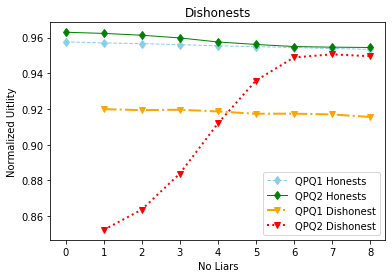

In [12]:
####################
# Sim Dishonest
####################
simresults = {'UtilityHonests1': [], 'UtilityHonests2': [], 'QPQ/QPQ2_Honests': [], 
              'UtilityDishonests1': [], 'UtilityDishonests2': [], 'QPQ/QPQ2_Dishonests': [],
              'numLiars': [] 
             }
for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue
         
                    dfTmp1 = df[(df.QPQversion == 1) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars)]
                    dfTmp2 = df[(df.QPQversion == 2) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars)]
                    
                    UtilityHonests1 = dfTmp1.UtilityHonest.mean()
                    UtilityHonests2 = dfTmp2.UtilityHonest.mean()

                    simresults['UtilityHonests1'].append(NormalizeUtility(UtilityHonests1, numplayers))
                    simresults['UtilityHonests2'].append(NormalizeUtility(UtilityHonests2, numplayers))
                    simresults['QPQ/QPQ2_Honests'].append(UtilityHonests1/UtilityHonests2)
                    if (numLiars > 0):
                        UtilityMixDishonests1 = dfTmp1.UtilityDishonest.mean()
                        UtilityMixDishonests2 = dfTmp2.UtilityDishonest.mean()

                        simresults['UtilityDishonests1'].append(NormalizeUtility(UtilityMixDishonests1, numplayers))
                        simresults['UtilityDishonests2'].append(NormalizeUtility(UtilityMixDishonests2, numplayers))
                        simresults['QPQ/QPQ2_Dishonests'].append(UtilityMixDishonests1/UtilityMixDishonests2)
                    else:
                        simresults['UtilityDishonests1'].append(float('NaN'))
                        simresults['UtilityDishonests2'].append(float('NaN'))
                        simresults['QPQ/QPQ2_Dishonests'].append(float('NaN'))

                    simresults['numLiars'].append(numLiars)
                    
rst = pd.DataFrame(data=simresults) 
# multiple line plot
plt.plot( 'numLiars', 'UtilityHonests1', data=rst, marker='d', color='skyblue', linestyle='--', linewidth=1, label="QPQ1 Honests")
plt.plot( 'numLiars', 'UtilityHonests2', data=rst, marker='d', color='green', linestyle='-', linewidth=1, label="QPQ2 Honests")
plt.plot( 'numLiars', 'UtilityDishonests1', data=rst, marker='v', color='orange', linestyle='-.', linewidth=2, label="QPQ1 Dishonest")
plt.plot( 'numLiars', 'UtilityDishonests2', data=rst, marker='v', color='red', linestyle=':', linewidth=2, label="QPQ2 Dishonest")
plt.title("Dishonests")
plt.xlabel("No Liars")
plt.ylabel("Normalized Uitlity");
plt.legend()
plt.savefig(commondir + 'images/numliars.eps', format='eps')
plt.savefig(commondir + 'images/numliars.pdf', format='pdf')

Nota: parece que la forma de la curva para qpq2 es por agrupar a todos los mentirosos en un mismo cluster. Es necesario repetir esta grafica pero repartiendo los mentirosos en clusters de forma aleatoria.

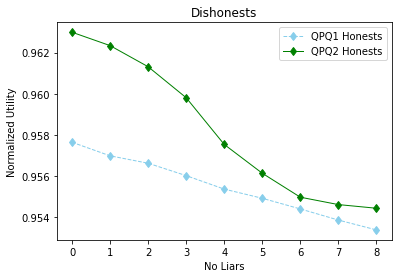

In [13]:
rst = pd.DataFrame(data=simresults)
# multiple line plot
plt.plot( 'numLiars', 'UtilityHonests1', data=rst, marker='d', color='skyblue', linestyle='--', linewidth=1, label="QPQ1 Honests")
plt.plot( 'numLiars', 'UtilityHonests2', data=rst, marker='d', color='green', linestyle='-', linewidth=1, label="QPQ2 Honests")
plt.title("Dishonests")
plt.xlabel("No Liars")
plt.ylabel("Normalized Utility");
plt.legend()

# Sim Players

In [14]:
####################
# Sim Players
####################
dir = commondir + 'sim-players/results'

# History length
historyLenArray = [100] 
alpha = 1 

# Number of players
numplayersArray = [16, 32, 64, 128, 256]

# betafactor (dishonest beta factor) Array
betafactorArray = [1.2]

# Number of Liars
numLiarsArray = [0, 1]

# Number of clusters
numclustersArray = [8]


if not os.path.exists(dir):
    os.mkdir(dir)
    
frames=[]    
for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue

                    rounds = historyLen*10
                    file_name = 'QPQRst-{0}-{1}-{2}-{3}-{4}-{5}-{6}.csv'.format(str(numplayers),str(numclusters),str(rounds),str(betaFactor),str(numLiars),str(historyLen), "*")
                    search_path = os.path.join(dir, file_name)
                    for fname in glob.glob(search_path):
                        #print("Reading file ", fname," using numplayers =", numplayers, 
                        #      " numclusters = ", numclusters, " numLiars = ", numLiars, " betafactor = ", betaFactor, " and historyLen = ", historyLen)
                        tmpdf = pd.read_csv(fname)
                        frames.append(tmpdf)
                                    
df = pd.concat(frames, ignore_index=True)
df.head(20)

,players,clusters,playerperclusters,numliars,QPQversion,alpha,rounds,betafactor,QPQHL,QPQTH,...,QPQ2HL1,QPQ2TH1,UtilityHonest,UtilityDishonest,FNTotalHonest,FNTotalDishonest,UtilityHonest_HL,UtilityDishonest_HL,FNTotalHonest_HL,FNTotalDishonest_HL
0,16,8,16,0,1,NaN,1000,1.2,100,0.97,...,NaN,NaN,0.003728,NaN,0.006250,NaN,0.003748,NaN,0.006458,NaN
1,16,8,2,0,2,1.0,1000,1.2,100,0.97,...,160.0,0.975477,0.003695,NaN,0.002437,NaN,0.003711,NaN,0.002569,NaN
2,16,8,16,0,1,NaN,1000,1.2,100,0.97,...,NaN,NaN,0.004099,NaN,0.021375,NaN,0.004148,NaN,0.023611,NaN
3,16,8,2,0,2,1.0,1000,1.2,100,0.97,...,160.0,0.975477,0.005244,NaN,0.053187,NaN,0.005409,NaN,0.058958,NaN
4,16,8,16,0,1,NaN,1000,1.2,100,0.97,...,NaN,NaN,0.003931,NaN,0.015375,NaN,0.003981,NaN,0.016736,NaN
5,16,8,2,0,2,1.0,1000,1.2,100,0.97,...,160.0,0.975477,0.003905,NaN,0.000000,NaN,0.003954,NaN,0.000000,NaN
6,16,8,16,0,1,NaN,1000,1.2,100,0.97,...,NaN,NaN,0.004095,NaN,0.017500,NaN,0.004157,NaN,0.018403,NaN
7,16,8,2,0,2,1.0,1000,1.2,100,0.97,...,160.0,0.975477,0.004272,NaN,0.018562,NaN,0.004355,NaN,0.020000,NaN
8,16,8,16,0,1,NaN,1000,1.2,100,0.97,...,NaN,NaN,0.003952,NaN,0.011062,NaN,0.004001,NaN,0.010694,NaN
9,16,8,2,0,2,1.0,1000,1.2,100,0.97,...,160.0,0.975477,0.003779,NaN,0.004938,NaN,0.003736,NaN,0.002222,NaN


In [15]:
####################
# Sim Players
####################
for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue

                    dfTmp1 = df[(df.QPQversion == 1) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor)]
                    dfTmp2 = df[(df.QPQversion == 2) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor)]

                    dfTmp1Honests = dfTmp1[(dfTmp1.numliars == 0)]
                    dfTmp1Mix = dfTmp1[(dfTmp1.numliars == 1)]

                    dfTmp2Honests = dfTmp2[(dfTmp2.numliars == 0)]
                    dfTmp2Mix = dfTmp2[(dfTmp2.numliars == 1)]

                    UtilityHonests1 = dfTmp1Honests.UtilityHonest.mean()
                    UtilityHonests2 = dfTmp2Honests.UtilityHonest.mean()

                    UtilityMixHonests1 = dfTmp1Mix.UtilityHonest.mean()
                    UtilityMixHonests2 = dfTmp2Mix.UtilityHonest.mean()
                    if (numLiars > 0):
                        UtilityMixDishonests1 = dfTmp1Mix.UtilityDishonest.mean()
                        UtilityMixDishonests2 = dfTmp2Mix.UtilityDishonest.mean()

                    print("\nSimulation using numplayers =", numplayers, " numclusters = ", numclusters, 
                          " numLiars = ", numLiars, " betafactor = ", betaFactor, " and historyLen = ", historyLen)
                    if dfTmp1Honests.empty or dfTmp2Honests.empty:
                        print("\tDataFrame is empty!")
                        continue
                    else:
                        print("\tDataFrame has", len( dfTmp1Honests), " simulations.")
                    print("\tPlayer Utility QPQ. All honest players: {:.5f}".format(UtilityHonests1))
                    print("\tPlayer Utility QPQ2. All honest players: {:.5f}".format(UtilityHonests2))
                    print("\tPlayer Utility Ratio QPQ/QPQ2. All honest players: {:.5f}".format(UtilityHonests1/UtilityHonests2))
                    if (numLiars > 0):
                        print("\n\tPlayer Utility QPQ. Honest players: {:.5f}, Dishonest player: {:.5f}".format(UtilityMixHonests1, UtilityMixDishonests1))
                        print("\tPlayer Utility QPQ2. Honest players: {:.5f}, Dishonest player: {:.5f}".format(UtilityMixHonests2, UtilityMixDishonests2))
                        print("\tPlayer Utility Ratio QPQ/QPQ2. Honest players: {:.5f}, Dishonest player: {:.5f}".format(UtilityMixHonests1/UtilityMixHonests2, UtilityMixDishonests1/UtilityMixDishonests2))


Simulation using numplayers = 16  numclusters =  8  numLiars =  0  betafactor =  1.2  and historyLen =  100
	DataFrame has 3050  simulations.
	Player Utility QPQ. All honest players: 0.00401
	Player Utility QPQ2. All honest players: 0.00413
	Player Utility Ratio QPQ/QPQ2. All honest players: 0.97103

Simulation using numplayers = 16  numclusters =  8  numLiars =  1  betafactor =  1.2  and historyLen =  100
	DataFrame has 3050  simulations.
	Player Utility QPQ. All honest players: 0.00401
	Player Utility QPQ2. All honest players: 0.00413
	Player Utility Ratio QPQ/QPQ2. All honest players: 0.97103

	Player Utility QPQ. Honest players: 0.00415, Dishonest player: 0.00393
	Player Utility QPQ2. Honest players: 0.00432, Dishonest player: 0.00509
	Player Utility Ratio QPQ/QPQ2. Honest players: 0.96177, Dishonest player: 0.77190

Simulation using numplayers = 32  numclusters =  8  numLiars =  0  betafactor =  1.2  and historyLen =  100
	DataFrame has 3050  simulations.
	Player Utility QPQ. All

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


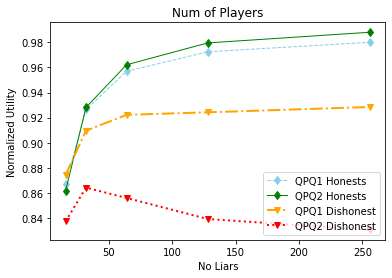

In [16]:
####################
# Sim Players
####################
simresults = {'UtilityHonests1': [], 'UtilityHonests2': [], 'QPQ/QPQ2_Honests': [], 
              'UtilityDishonests1': [], 'UtilityDishonests2': [], 'QPQ/QPQ2_Dishonests': [],
              'numplayers': [] 
             }
for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate([1]):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue
         
                    dfTmp1 = df[(df.QPQversion == 1) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars)]
                    dfTmp2 = df[(df.QPQversion == 2) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars)]

                    UtilityHonests1 = dfTmp1.UtilityHonest.mean()
                    UtilityHonests2 = dfTmp2.UtilityHonest.mean()

                    simresults['UtilityHonests1'].append(NormalizeUtility(UtilityHonests1, numplayers))
                    simresults['UtilityHonests2'].append(NormalizeUtility(UtilityHonests2, numplayers))
                    simresults['QPQ/QPQ2_Honests'].append(UtilityHonests1/UtilityHonests2)

                    if (numLiars > 0):
                        UtilityMixDishonests1 = dfTmp1.UtilityDishonest.mean()
                        UtilityMixDishonests2 = dfTmp2.UtilityDishonest.mean()

                        simresults['UtilityDishonests1'].append(NormalizeUtility(UtilityMixDishonests1, numplayers))
                        simresults['UtilityDishonests2'].append(NormalizeUtility(UtilityMixDishonests2, numplayers))
                        simresults['QPQ/QPQ2_Dishonests'].append(UtilityMixDishonests1/UtilityMixDishonests2)
                    else:
                        simresults['UtilityDishonests1'].append(float('NaN'))
                        simresults['UtilityDishonests2'].append(float('NaN'))
                        simresults['QPQ/QPQ2_Dishonests'].append(float('NaN'))

                    simresults['numplayers'].append(numplayers)
                    
                    
rst = pd.DataFrame(data=simresults) 
# multiple line plot
plt.plot( 'numplayers', 'UtilityHonests1', data=rst, marker='d', color='skyblue', linestyle='--', linewidth=1, label="QPQ1 Honests")
plt.plot( 'numplayers', 'UtilityHonests2', data=rst, marker='d', color='green', linestyle='-', linewidth=1, label="QPQ2 Honests")
plt.plot( 'numplayers', 'UtilityDishonests1', data=rst, marker='v', color='orange', linestyle='-.', linewidth=2, label="QPQ1 Dishonest")
plt.plot( 'numplayers', 'UtilityDishonests2', data=rst, marker='v', color='red', linestyle=':', linewidth=2, label="QPQ2 Dishonest")
plt.title("Num of Players")
plt.xlabel("No Liars")
plt.ylabel("Normalized Utility");
plt.legend()
plt.savefig(commondir + 'images/numplayers.eps', format='eps')
plt.savefig(commondir + 'images/numplayers.pdf', format='pdf')

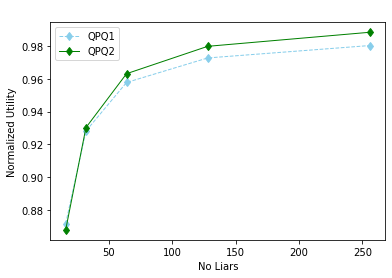

In [17]:
simresults = {'UtilityHonests1': [], 'UtilityHonests2': [], 'QPQ/QPQ2_Honests': [], 
              'UtilityDishonests1': [], 'UtilityDishonests2': [], 'QPQ/QPQ2_Dishonests': [],
              'numplayers': [] 
             }
for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate([0]):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue
         
                    dfTmp1 = df[(df.QPQversion == 1) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars)]
                    dfTmp2 = df[(df.QPQversion == 2) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars)]

                    UtilityHonests1 = dfTmp1.UtilityHonest.mean()
                    UtilityHonests2 = dfTmp2.UtilityHonest.mean()
                    
                    simresults['UtilityHonests1'].append(NormalizeUtility(UtilityHonests1, numplayers))
                    simresults['UtilityHonests2'].append(NormalizeUtility(UtilityHonests2, numplayers))
                    simresults['QPQ/QPQ2_Honests'].append(UtilityHonests1/UtilityHonests2)
                    if (numLiars > 0):
                        UtilityMixDishonests1 = dfTmp1.UtilityDishonest.mean()
                        UtilityMixDishonests2 = dfTmp2.UtilityDishonest.mean()

                        simresults['UtilityDishonests1'].append(NormalizeUtility(UtilityMixDishonests1, numplayers))
                        simresults['UtilityDishonests2'].append(NormalizeUtility(UtilityMixDishonests2, numplayers))
                        simresults['QPQ/QPQ2_Dishonests'].append(UtilityMixDishonests1/UtilityMixDishonests2)
                    else:
                        simresults['UtilityDishonests1'].append(0)
                        simresults['UtilityDishonests2'].append(0)
                        simresults['QPQ/QPQ2_Dishonests'].append(1)

                    simresults['numplayers'].append(numplayers)
                    
rst = pd.DataFrame(data=simresults)
# multiple line plot
plt.plot( 'numplayers', 'UtilityHonests1', data=rst, marker='d', color='skyblue', linestyle='--', linewidth=1, label="QPQ1")
plt.plot( 'numplayers', 'UtilityHonests2', data=rst, marker='d', color='green', linestyle='-', linewidth=1, label="QPQ2")
plt.title(" ")
plt.xlabel("No Liars")
plt.ylabel("Normalized Utility");
plt.legend()